# BEST PINCH HITTERS IN IPL 

In [91]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 0)

import matplotlib.pyplot as plt
deliveries =pd.read_csv(r'C:\Users\kushs\Downloads\Datasets\deliveries.csv')
matches = pd.read_csv(r"C:\Users\kushs\Downloads\matches.csv")

In [92]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

def playerStatistics(df):
    
    
    df['isDot']= df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne']= df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo']= df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree']= df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour']= df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix']= df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs=pd.DataFrame(df.groupby([ 'batsman'])['batsman_runs'].sum()).rename(columns={'batsman_runs':'runs'})
    balls= pd.DataFrame(df.groupby([ 'batsman'])['match_id'].count()).rename(columns={'match_id':'balls'})
    innings=pd.DataFrame(df.groupby([ 'batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns= {'match_id':'innings'})
    dismissals=pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissal'})
    sixes=df.groupby(['batsman'])['isSix'].sum().reset_index().rename(columns= {'isSix': 'sixes'})
    fours=df.groupby(['batsman'])['isFour'].sum().reset_index().rename(columns= {'isFour': 'fours'})
    dots=df.groupby(['batsman'])['isDot'].sum().reset_index().rename(columns= {'isDot': 'dots'})

    df=pd.merge(innings, runs, on ='batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman').merge(dots, on = 'batsman')
    df['RPI']= df.apply(lambda x: (x['runs']/x['innings']), axis=1)
    df['SR']= df.apply(lambda x: 100*(x['runs']/x['balls']), axis=1)
    df['BPB']= df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    df['dot%']= df.apply(lambda x: (x['dots']/ x['balls']), axis=1)
    
    return df

In [93]:
df= playerStatistics(deliveries)

### PERFORMANCE IN DIFFERENT PHASES:

In [94]:
def phase(over):
    if over <=6:
        return 'Powerplay'
    elif over <=15:
        return 'Middle'
    else:
        return 'Death'
        

In [95]:
deliveries['phase']= deliveries['over'].apply(lambda x: phase(x))

In [96]:
def phasesOfplay(df, current_phase):
    
    df=df[df.phase == current_phase]
    df.reset_index(inplace=True, drop= True)
    
    df['isDot']= df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne']= df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo']= df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree']= df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour']= df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix']= df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs=pd.DataFrame(df.groupby([ 'batsman'])['batsman_runs'].sum()).rename(columns={'batsman_runs':'runs'})
    balls= pd.DataFrame(df.groupby([ 'batsman'])['match_id'].count()).rename(columns={'match_id':'balls'})
    innings=pd.DataFrame(df.groupby([ 'batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns= {'match_id':'innings'})
    dismissals=pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissal'})
    
    
    dots=df.groupby(['batsman'])['isDot'].sum().reset_index().rename(columns= {'isDot': 'dots'})
    ones=df.groupby(['batsman'])['isOne'].sum().reset_index().rename(columns= {'isOne': 'ones'})
    twos=df.groupby(['batsman'])['isTwo'].sum().reset_index().rename(columns= {'isTwo': 'twos'})
    threes=df.groupby(['batsman'])['isThree'].sum().reset_index().rename(columns= {'isThree': 'threes'})
    sixes=df.groupby(['batsman'])['isSix'].sum().reset_index().rename(columns= {'isSix': 'sixes'})
    fours=df.groupby(['batsman'])['isFour'].sum().reset_index().rename(columns= {'isFour': 'fours'})
    
    df=pd.merge(innings, runs, on ='batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman').merge(dots, on = 'batsman')
    
    df['RPI']= df.apply(lambda x: (x['runs']/x['innings']), axis=1)
    df['SR']= df.apply(lambda x: 100*(x['runs']/x['balls']), axis=1)
    df['BPB']= df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    df['dot%']= df.apply(lambda x: (x['dots']/ x['balls']), axis=1)
    
    return df

In [97]:
pp_df= phasesOfplay(deliveries, 'Powerplay')
mid_df= phasesOfplay(deliveries, 'Middle')
dth_df= phasesOfplay(deliveries, 'Death')

## Min 20 innings & 1000 runs

In [98]:
df= df[df['innings'] >= 20]
df= df[df['runs'] >= 1000]

In [99]:
df=df.sort_values(by='SR', ascending = False).head(15)

In [100]:
df.head(15)

,batsman,innings,runs,balls,dismissal,fours,sixes,dots,RPI,SR,BPB,dot%
143,GJ Maxwell,55,1229,780,50,96,82,305,22.345455,157.564103,4.382022,0.391026
433,V Sehwag,104,2728,1833,98,334,106,737,26.230769,148.827059,4.165909,0.402073
22,AB de Villiers,118,3486,2402,85,287,158,778,29.542373,145.129059,5.397753,0.323897
85,CH Gayle,100,3651,2532,90,297,266,1178,36.510000,144.194313,4.497336,0.465245
454,YK Pathan,133,2922,2076,99,240,149,765,21.969925,140.751445,5.336761,0.368497
190,KA Pollard,112,2354,1674,85,158,148,654,21.017857,140.621266,5.470588,0.390681
103,DA Warner,114,4014,2902,102,401,160,1124,35.210526,138.318401,5.172906,0.387319
102,DA Miller,64,1563,1135,45,104,78,382,24.421875,137.709251,6.236264,0.336564
374,SK Raina,157,4548,3369,133,402,174,1163,28.968153,134.995548,5.848958,0.345206
390,SR Watson,98,2628,1949,85,258,122,822,26.816327,134.838379,5.128947,0.421755


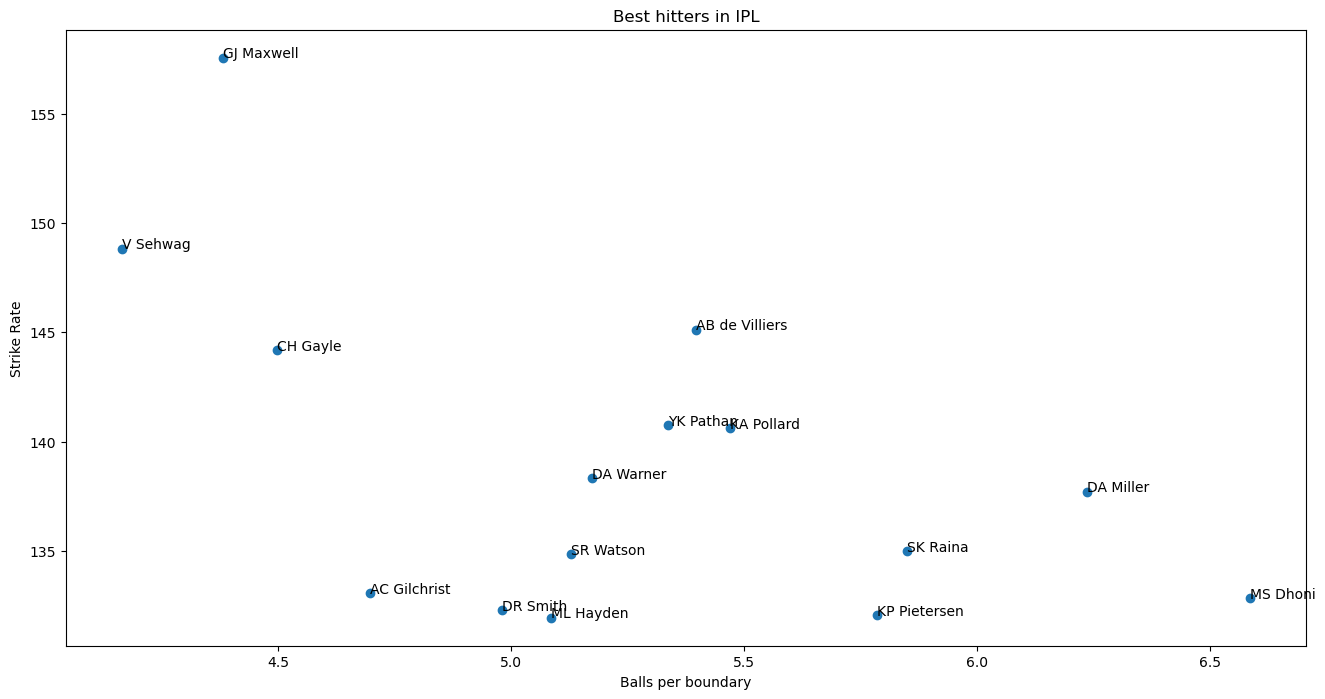

In [101]:
plt.figure(figsize=(16,8))
plt.scatter(df.BPB, df.SR)
plt.xlabel('Balls per boundary')
plt.ylabel('Strike Rate')
plt.title('Best hitters in IPL')

for i in range(len(df)):
    plt.text(df.iloc[i]['BPB'], df.iloc[i]['SR'], df.iloc[i]['batsman'])

plt.show()    

# Let's look best Hitters in death overs as well

#### We will consider on the base of Runs and Strike Rate in last 5 overs:


In [102]:
ddf=dth_df.sort_values(by='runs', ascending= False).head(15)

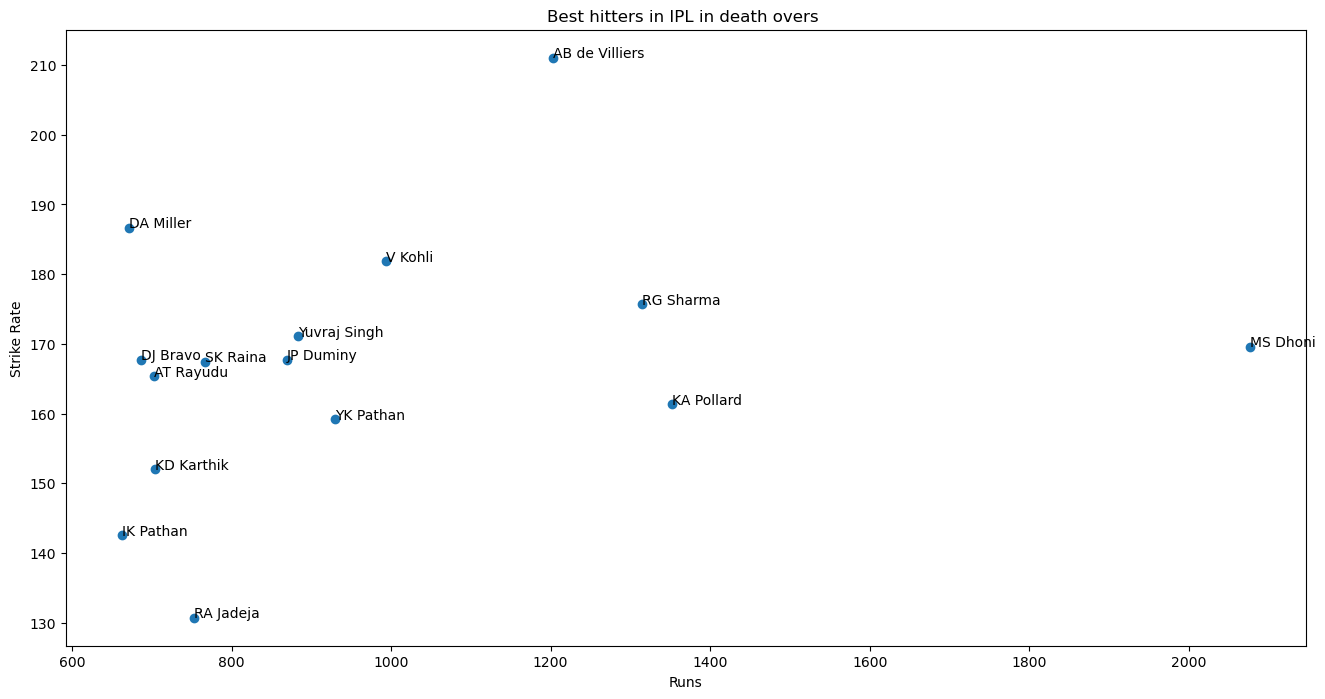

In [103]:
plt.figure(figsize=(16,8))
plt.scatter(ddf.runs, ddf.SR)

plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.title('Best hitters in IPL in death overs ')

for i in range(len(ddf)):
    plt.text(ddf.iloc[i]['runs'], ddf.iloc[i]['SR'], ddf.iloc[i]['batsman'])


plt.show()

## CONCLUSION

### Clearly MS Dhoni is a legend of Indian Cricket Team. He is in both the lists with among the best hitters in IPL
